#### Analisis de Sentimientos y procesamiento del lenguaje natural NLP


In [53]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('film_reviews_result.csv', sep= "|", )

In [54]:
reviews.sample(5)

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
2504,Criptoestafas,"Documental, Internet / Informática, True Crime","5,6",8,El Al Capone de las criptos,Disfrutable e increíble historia de principio ...
262,Godzilla: Minus One,"Fantástico, Acción, Drama, Ciencia ficción, Bé...","6,7",6,¿Por qué estás tan cabreado Godzilla?,Como viajo a Japón en breve decido acercarme a...
8972,Perdidos en el espacio (Serie de TV),"Serie de TV, Ciencia ficción, Aventura espacia...","5,7",2,Serie moñas con recursos,"Muchos recursos, pero las historias suenan tan..."
6234,Los crímenes de la academia,"Intriga, Thriller, Terror, Siglo XIX, Crimen","5,8",6,"Lo que le falta a las víctimas, le falta a la ...",Después de 'La ley del más fuerte' y 'Hostiles...
1747,Damsel,"Fantástico, Aventuras, Acción, Dragones, Super...","5,3",3,Raya en lo ridículo,El director deja de lado detalles importantes ...


Este dataset (corpus) contiene criticas realizadas por los usuarios de www.filmaffinity.com sobre todas las películas y series españolas (Mas de 10000 peliculas).   


El dataset (copus) esta formado por:    

film_name: Título de la película.     
gender: Genero de la película (comedia, terror, acción, etc.)         
film_avg_rate: Nota media de la película (votos de todos los usuarios)      
review_rate: Nota que el usuario que hace la crítica pone a la película.      
review_title: Título de la crítica.     
review_text: Crítica de la película     

In [55]:
#examinacion de valores nulo

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10058 entries, 0 to 10057
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   film_name      10058 non-null  object
 1   gender         10058 non-null  object
 2   film_avg_rate  10058 non-null  object
 3   review_rate    10058 non-null  int64 
 4   review_title   10058 non-null  object
 5   review_text    10058 non-null  object
dtypes: int64(1), object(5)
memory usage: 471.6+ KB


In [56]:
#funcion de prosesamiento de datos


In [ ]:
import re, string
from nltk.corpus import stopwords
import spacy

nlp_lematizar = spacy.load('es_core_news_sm') #reducir palabras a su forma base o lema (ej. “corriendo” → “correr”).
palabras_vacias = list(stopwords.words('spanish'))
print(palabras_vacias[1:10])

#Cosntruccion de funcion para trabajar cada comentario
coment = "Un ejemplo de !!!película con muy buenas críticas.,/*-"

def limpieza(comentario, i = " "):
  texto = comentario.lower()
  texto.encode('ascii', 'ignore').decode('ascii') #eliminamos caracteristicas raras emojis etc
  texto =  re.sub(f"[{re.escape(string.punctuation)}]", "", texto) #Eliminacion de signos de puntuacion
  doc = nlp_lematizar(texto)  # tokeniza y lematiza  salida objeto Doc
  tokens = [i.lemma_ for i in doc if i.lemma_ not in palabras_vacias]
  return tokens

limpieza(coment)

# Se utilizará Este objeto con el cual Se eliminará aquellas palabras que no tienen un significado Representativo dentro del comentario

['la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


['ejemplo', 'película', 'buena', 'crítica']

In [ ]:
reviews2 = (
  reviews
  .assign(
    review_rate = lambda x: x['review_rate'].astype('float'),
    film_avg_rate = lambda x: x['film_avg_rate'].str.replace(",", ".").astype('float'),
    genero =  reviews['gender'].str.split(",").str[0], #De cada lista dentro de cada fila, dame el elemento en la posición 0
    tokenizacion =  lambda x :  x['review_text'].map(limpieza)
  )
)




,film_name,gender,film_avg_rate,review_rate,review_title,review_text
4713,Unos suegros de armas tomar,"Acción, Comedia","4,3",3,Truño sonrojante,Una pedazo de chorrada como un puto planeta. E...
1153,Sangre de Zeus (Serie de TV),"Serie de TV, Animación, Acción, Fantástico, Mi...","6,5",7,Un gran regreso a las epopeyas griegas,Tras el reciente éxito de el estudio Power hou...
8219,No mires arriba,"Comedia, Drama, Ciencia ficción, Sátira, Catás...","6,6",6,"Planteamiento interesante, ejecución mediocre.",Una de las producciones más populares de Netfl...
771,As bestas,"Thriller, Drama, Vida rural","7,6",9,Auténtico drama rural,"Ahora que ""As bestas"" ha quedado como triunfad..."
3382,Onimusha (Serie de TV),"Serie de TV, Animación, Acción, Aventuras, Fan...","6,2",6,No es Onimusha,"Es un buen anime estilo ""shonen"", con una mezc..."


In [105]:
reviews2 = (
  reviews2
  .assign(
    conteo_palabras = lambda x : x['tokenizacion'].str.len(),
  )
)

reviews2.sample(5)

,film_name,gender,film_avg_rate,review_rate,review_title,review_text,genero,tokenizacion,conteo_palabras
8806,El poder del perro,"Western, Drama, Drama psicológico, Homosexuali...",6.4,4.0,Mi masculinidad y mi entrepierna... Y me gusta...,"Una del oeste porque es de principios de S.XX,...",Western,"[oeste, ser, principio, sxx, montana, rancho, ...",129
3182,El asesino,"Thriller, Intriga, Crimen, Cómic",6.3,4.0,Una publicidad de Amazon de dos horas,Habitualmente me gustan las películas de Finch...,Thriller,"[habitualmente, gustar, película, fincher, par...",62
5314,El silencio (Miniserie de TV),"Serie de TV, Thriller, Intriga, Miniserie de T...",4.5,2.0,Neuróticos inmortales. Irritante y desesperant...,Si tenemos en cuenta la dificultad con la que ...,Serie de TV,"[si, tener, cuenta, dificultad, poder, encontr...",210
4088,El cuerpo en llamas (Miniserie de TV),"Serie de TV, Thriller, Intriga, Basado en hech...",6.5,5.0,"PARA MI, SOLO PASABLE",Debo decir que la serie no me ha gustado y no ...,Serie de TV,"[deber, decir, serie, haber, gustar, factura, ...",136
2945,American Symphony,"Documental, Enfermedad, Música",5.9,8.0,American Symphony. El arte en sus diferentes f...,Entré en Netflix e indagué en su sección de lo...,Documental,"[entré, netflix, indagar, sección, oscar, habe...",377


In [ ]:
#cuanta pelicualas y comentarios se disponen

peliculas_comentarios = (
  reviews2
  .groupby('film_name', as_index=False)
  .size()
  .sort_values('size', ascending=False)
)
print("#Distribucion del numero de comentarios por pelicula",
      "\n"*2,
      peliculas_comentarios.describe(),
      "\n"*2,
      "14 films con mas comentarios en el data set"
    )

print(peliculas_comentarios.reset_index(drop=True)[0:15])
#Aproximadamente exisyte 766 pelicual registradas
#vemo cuantos comentarios disponemos

#Distribucion del numero de comentarios por pelicula 

              size
count  766.000000
mean    13.130548
std     28.475857
min      1.000000
25%      2.000000
50%      4.500000
75%     13.000000
max    339.000000 

 14 films con mas comentarios en el data set
                                            film_name  size
0                      La casa de papel (Serie de TV)   339
1                                    No mires arriba    320
2                            La sociedad de la nieve    271
3                                          As bestas    246
4                                 El poder del perro    196
5                           The Witcher (Serie de TV)   156
6                     Los renglones torcidos de Dios    148
7                           Sin novedad en el frente    125
8   Puñales por la espalda: El misterio de Glass O...   124
9                            Cazafantasmas: Más allá    122
10                                        El asesino    119
11             

Utilziaremos otro paque de python plotline ya que es la representacipon de ggplot de r en python ¡Es una excelente noticia! Para muchos analistas que vienen de R, descubrir plotnine es como volver a casa.

In [112]:
reviews2.columns

Index(['film_name', 'gender', 'film_avg_rate', 'review_rate', 'review_title',
       'review_text', 'genero', 'tokenizacion', 'conteo_palabras'],
      dtype='object')

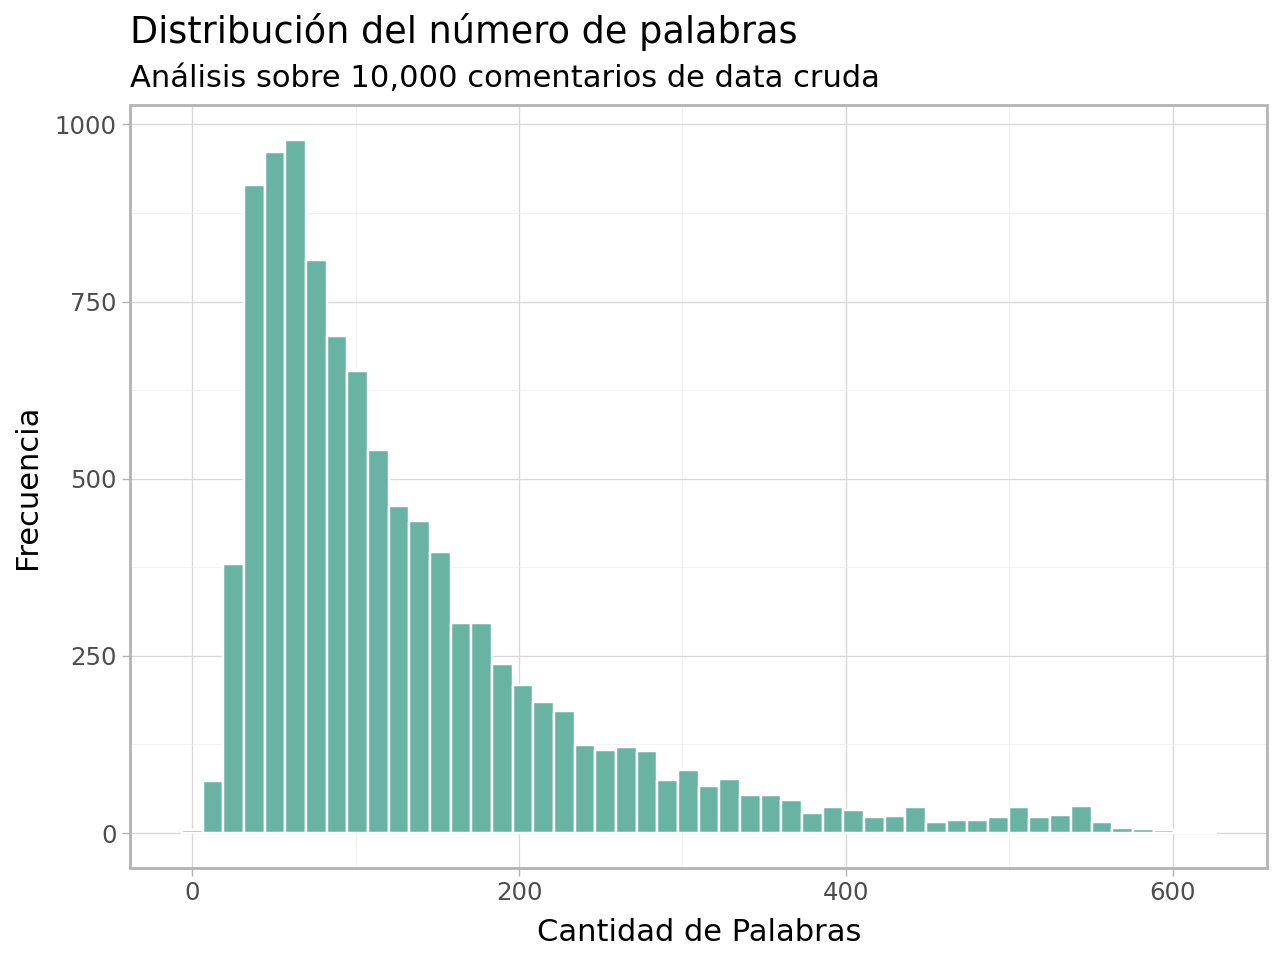

In [ ]:
from plotnine import ggplot, aes, geom_histogram, labs, theme_light

# Creamos el gráfico
grafico_longitud = (
    ggplot(reviews2) 
    + aes(x='conteo_palabras') 
    + geom_histogram(bins=50, fill="#69b3a2", color="white")
    + labs(
        title="Distribución del número de palabras",
        subtitle="Análisis sobre 10,058 comentarios de data cruda",
        x="Cantidad de Palabras",
        y="Frecuencia"
    )
    + theme_light()
)
# Para mostrarlo
grafico_longitud

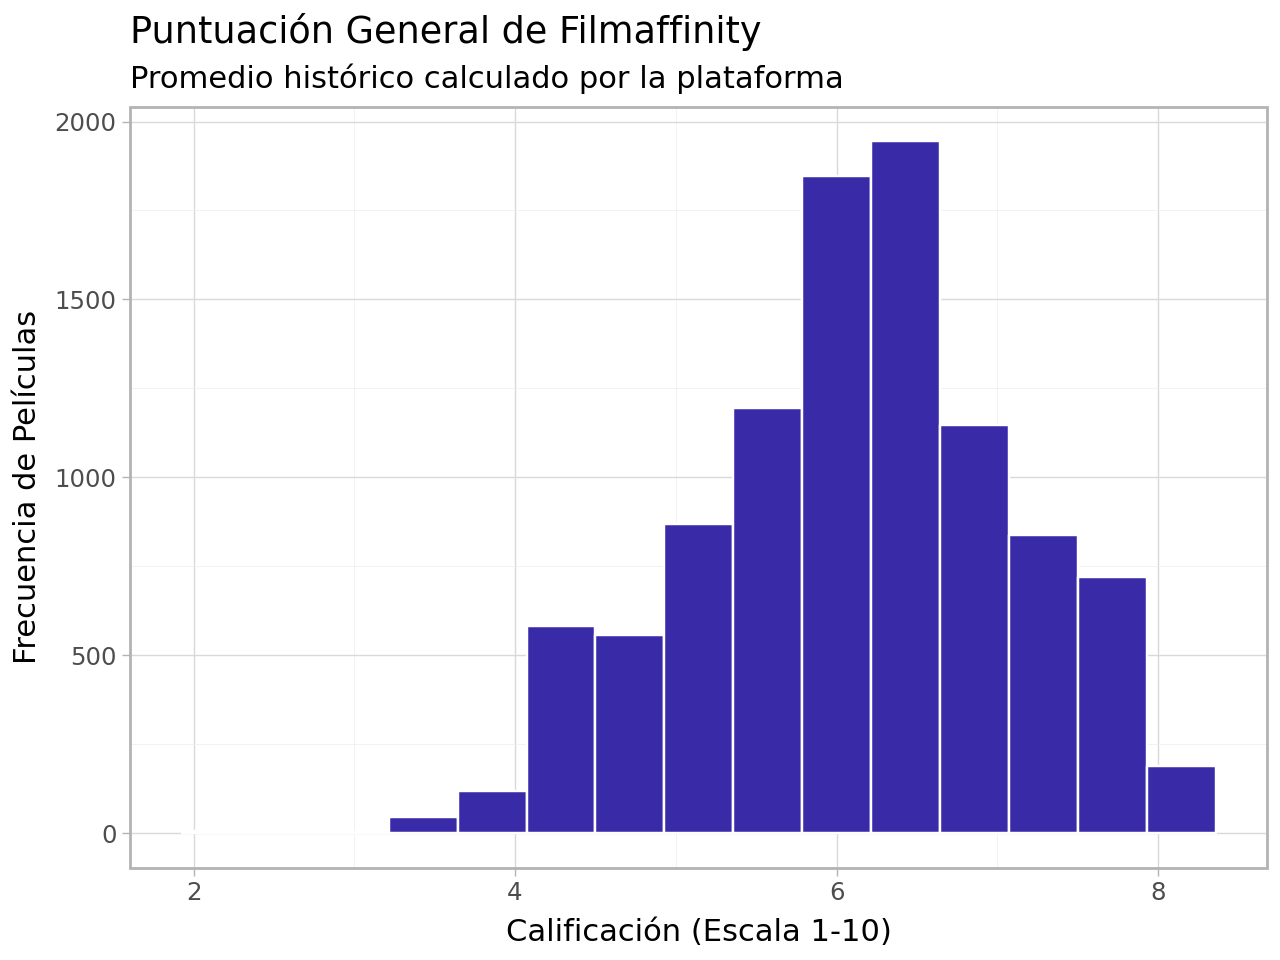

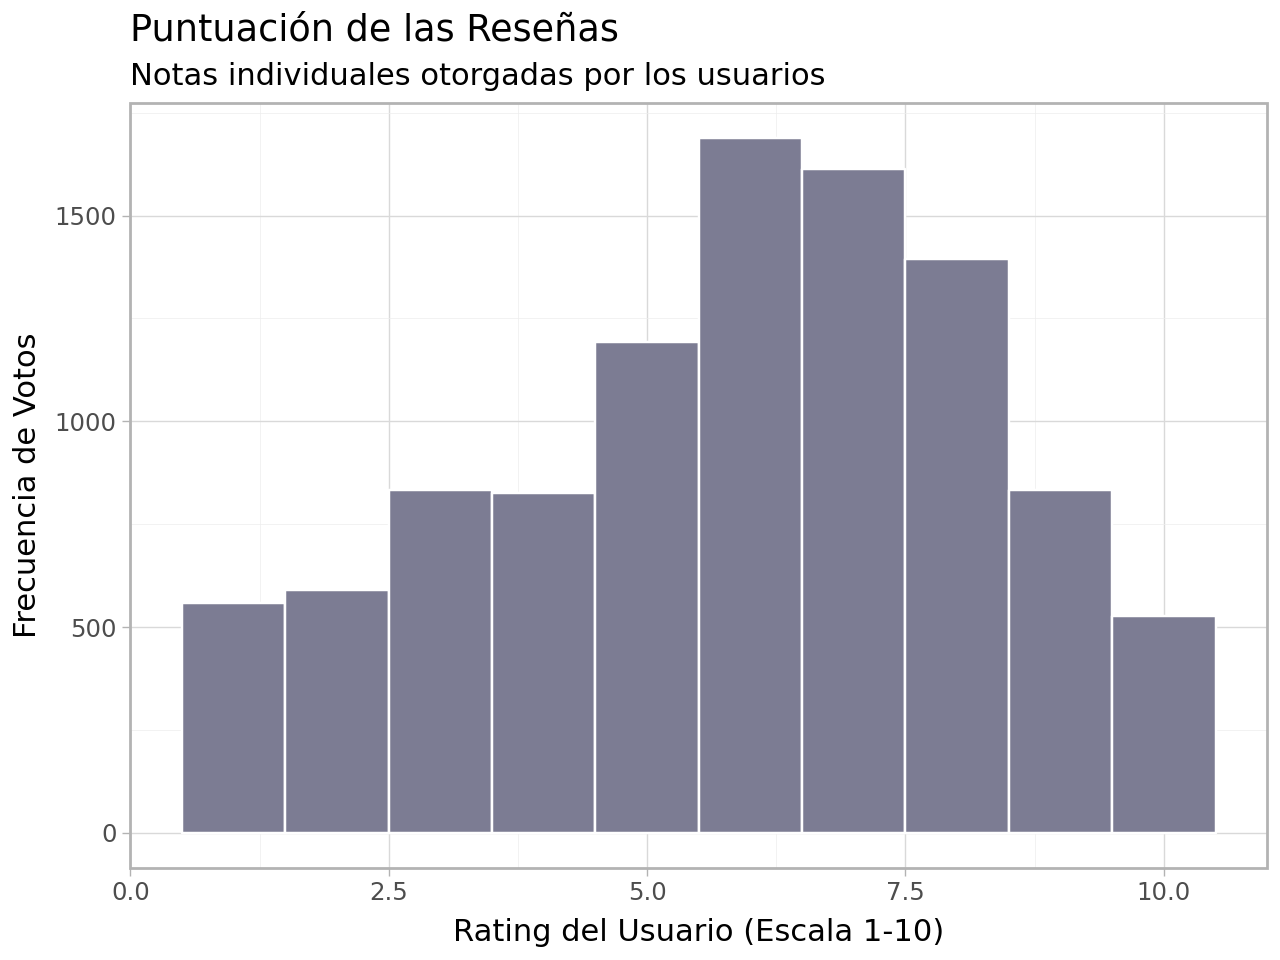

(None, None)

In [116]:
from plotnine import ggplot, aes, geom_col, labs, theme_light, coord_flip

#Gráfico de Calificación Promedio de la Película
p1 = (
    ggplot(reviews2) 
    + aes(x='film_avg_rate') 
    + geom_histogram(bins=15, fill="#392aa8", color="white")
    + labs(
        title="Puntuación General de Filmaffinity",
        subtitle="Promedio histórico calculado por la plataforma",
        x="Calificación (Escala 1-10)",
        y="Frecuencia de Películas"
    )
    + theme_light()
)

# Gráfico de Puntuación del Usuario
p2 = (
    ggplot(reviews2) 
    + aes(x='review_rate') 
    + geom_histogram(bins=10, fill="#7C7C93", color="white")
    + labs(
        title="Puntuación de las Reseñas",
        subtitle="Notas individuales otorgadas por los usuarios",
        x="Rating del Usuario (Escala 1-10)",
        y="Frecuencia de Votos"
    )
    + theme_light()
)

# 3. Unir los gráficos lado a lado sin usar los "ax" de Matplotlib (Evita el TypeError)
p1.show(), p2.show()

In [117]:
reviews2.columns

Index(['film_name', 'gender', 'film_avg_rate', 'review_rate', 'review_title',
       'review_text', 'genero', 'tokenizacion', 'conteo_palabras'],
      dtype='object')

In [ ]:
from plotnine import ggplot, aes, geom_col, labs, theme_light, coord_flip
generos = (
  reviews2
  .groupby("genero", as_index=False)
  .agg(
     {
         "film_name": "count"
     }
  )
  .sort_values("film_name", ascending=False)
  .assign(
      participacion_porce = lambda x : np.round((x["film_name"] / x["film_name"].sum())*100,2)
  )
)

p1 = (
    ggplot(generos)  # plotnine trabaja mejor con pandas
    + aes(x='reorder(genero, film_name)', y='film_name') #ordenamos el eje
    + geom_col(fill="#392aa8", color="white")
    + labs(
        title="Numero de videos por genero",
        x="Genero",
        y="Numero de Peliculas"
    )
    + theme_light()
    + coord_flip()  # opcional: mejora la lectura
)

p1.show()
generos

                 film_name
genero                    
Acción                 305
Animación              257
Aventuras              108
Bélico                 165
Ciencia ficción        332
Comedia                722
Documental             168
Drama                  857
Fantástico             287
Infantil                11
Intriga                619
Musical                 65
Romance                138
Serie de TV           4546
Terror                 303
Thriller               946
Western                229


PlotnineError: "Could not evaluate the 'x' mapping: 'reorder(genero, film_name)' (original error: name 'genero' is not defined)"